In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import xlrd
import numpy as np
import pandas as pd
import os
import re
from progressbar import *
import nibabel as nib
import pdb
import scipy.ndimage
import matplotlib.pyplot as plt
from my_tools import *
from preprocess import *
from PIL import Image

## All images are resampled according to the pixel dimension information read from the image header files. 
## This ensures that all images will have the same resolution.

header info from IXI002.nii.gz:
---------------------------------------- - ----------------------------------------
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 

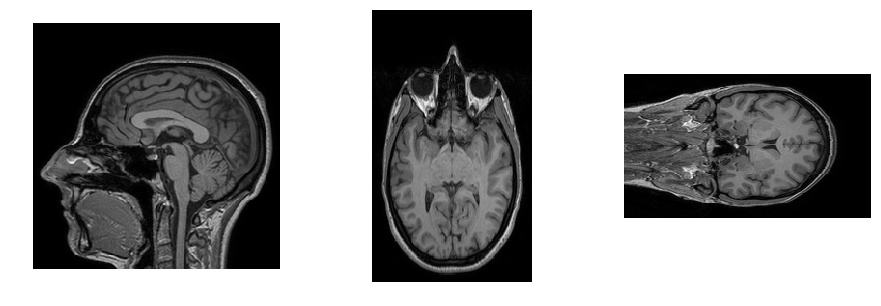

In [2]:
nii_img = nib.load('/media/woody/Elements/age_data/IXI/IXI-T1/IXI002.nii.gz')
header = nii_img.header
print('header info from IXI002.nii.gz:')
print_sep()
print(header)
print_sep()
pixdim = header['pixdim'][1:4]
print('\033[1;31mpixdim = {}\033[0m'.format(pixdim))
npy_img = nii_img.get_data()
print_sep()
print('How does IXI002.nii.gz look like:')
print2d(npy_img)

## After the resampling

How does the resampled image look like:
Dimension:  (120, 120, 90)


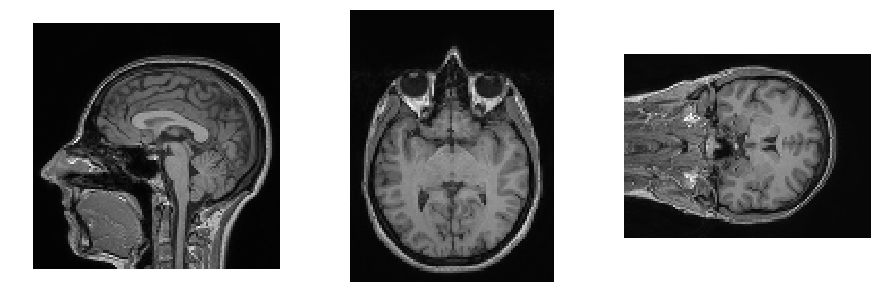

In [3]:
resampled_img = resample(npy_img, pixdim, [2,2,2])
print('How does the resampled image look like:')
print2d(resampled_img)

## The images are cropped and padded to the same shape (130,130,110)

How does the cropped image look like:
Dimension:  (130, 130, 110)


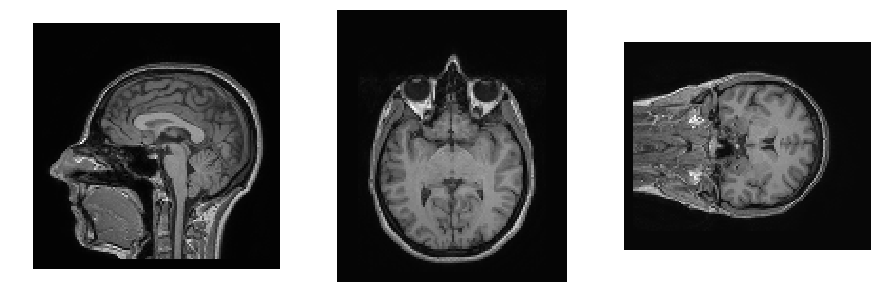

In [4]:
crop_padded_img = np.load('./IXI_npy/origin/IXI002.npy')
print('How does the cropped image look like:')
print2d(crop_padded_img)

## The mean image of all the training data is computed and is subtracted from all training and test data.
### It is worth noting that the test data does not contribute to the mean image. 
### This is because the training data, and only training data, needs to have zero mean for better training performance.

How does the mean values look like:
Dimension:  (130, 130, 110)


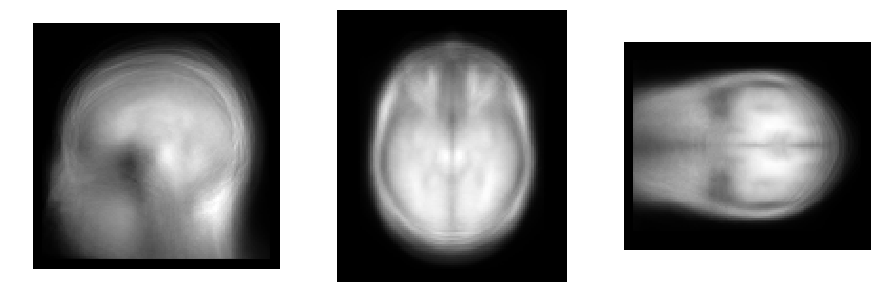

In [5]:
print('How does the mean values look like:')
mean_npy = np.load('./IXI_npy/mean_npy.npy')
print2d(mean_npy)


How does the mean values subtracted image look like:
Dimension:  (130, 130, 110)


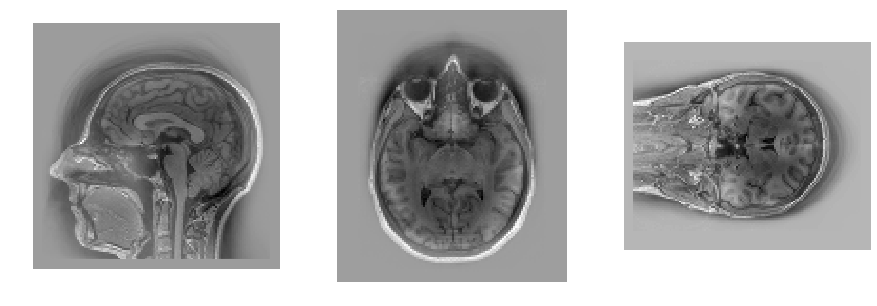

In [6]:
print('How does the mean values subtracted image look like:')
final_img = np.load('./IXI_npy/mean_subtracted/IXI002.npy')
print2d(final_img)

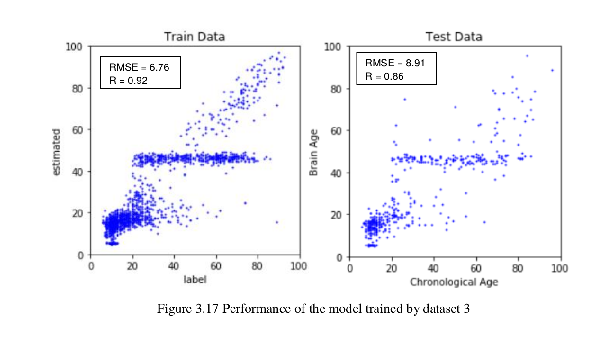

In [20]:
printimg(plt.imread('/home/woody/Pictures/d3.png'))